In [2]:
# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# ✅ Step 2: Load the Dataset
# Dataset: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

df = pd.read_csv(url, names=columns)

print("📊 Dataset Preview:")
print(df.head())

📊 Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# ✅ Step 3: Split into Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [5]:
# ✅ Step 4: Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# ✅ Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# ✅ Step 6: Build the ANN Model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output for binary classification

D:\python\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# ✅ Step 7: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# ✅ Step 8: Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8386 - loss: 0.3643
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8206 - loss: 0.3647 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8244 - loss: 0.3907 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3434 
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8403 - loss: 0.3787 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8140 - loss: 0.3983 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.3551 
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8233 - loss: 0.3651 
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3599 
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8063 - loss: 0.4014 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8270 - loss: 0.3744 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [11]:
# ✅ Step 9: Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7311 - loss: 0.5439  

✅ Test Accuracy: 75.32%


In [12]:
# ✅ Step 10: Make Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step



📌 Confusion Matrix:


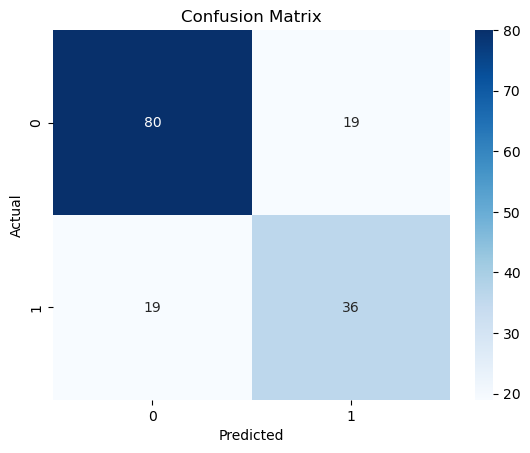


🔍 Accuracy: 0.75
🎯 Precision: 0.65
🎯 Recall: 0.65


In [13]:
# ✅ Step 11: Evaluation Metrics
print("\n📌 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"\n🔍 Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"🎯 Precision: {precision_score(y_test, y_pred):.2f}")
print(f"🎯 Recall: {recall_score(y_test, y_pred):.2f}")

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
new_data = np.array([[5, 121, 72, 23,112, 26.2, 0.245, 30]])

In [15]:
new_data_scaled = scaler.transform(new_data)

D:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [16]:
pred_prob = model.predict(new_data_scaled)
pred_class = (pred_prob > 0.5).astype(int)

print(f"Predicted Probability of Diabetes: {pred_prob[0][0]:.2f}")
print(f"Final Prediction (0 = No Diabetes, 1 = Diabetes): {pred_class[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Probability of Diabetes: 0.14
Final Prediction (0 = No Diabetes, 1 = Diabetes): 0


In [17]:
new_data = np.array([[2, 120, 70, 20, 80, 25.0, 0.5, 30]])

new_data_scaled = scaler.transform(new_data)

pred_prob = model.predict(new_data_scaled)
pred_class = (pred_prob > 0.5).astype(int)

print(f"Predicted Probability of Diabetes: {pred_prob[0][0]:.2f}")
print(f"Final Prediction (0 = No Diabetes, 1 = Diabetes): {pred_class[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Probability of Diabetes: 0.20
Final Prediction (0 = No Diabetes, 1 = Diabetes): 0


D:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
